In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install tslearn

In [2]:
import os
import math
import pandas as pd
import numpy as np
import folium
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from sklearn.preprocessing import MinMaxScaler
# Algorithms
# from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
path = '/content/gdrive/My Drive/airdata/'
data = pd.read_csv(path+'2015-2020.csv')
data.drop(data.columns[0],inplace=True,axis=1)
data

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,강원 강릉시,632132,옥천동,2015040101,0.0030,0.5,0.052,0.0050,57.0,41.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
1,강원 강릉시,632132,옥천동,2015040102,0.0030,0.5,0.060,0.0040,56.0,43.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
2,강원 강릉시,632132,옥천동,2015040103,0.0030,0.5,0.057,0.0040,72.0,54.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
3,강원 강릉시,632132,옥천동,2015040104,0.0030,0.5,0.049,0.0040,80.0,48.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
4,강원 강릉시,632132,옥천동,2015040105,0.0030,0.5,0.045,0.0040,62.0,30.0,강원 강릉시 옥천동 327-2(옥천동주민센터),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20383216,인천 옹진군,831495,울도,2020093020,0.0008,0.3,0.038,0.0017,18.0,NaN,인천 옹진군 덕적면 울도리 85번지,국가배경농도
20383217,인천 옹진군,831495,울도,2020093021,0.0008,0.3,0.036,0.0020,16.0,NaN,인천 옹진군 덕적면 울도리 85번지,국가배경농도
20383218,인천 옹진군,831495,울도,2020093022,0.0008,0.3,0.036,0.0018,17.0,NaN,인천 옹진군 덕적면 울도리 85번지,국가배경농도
20383219,인천 옹진군,831495,울도,2020093023,0.0008,0.3,0.036,0.0018,20.0,NaN,인천 옹진군 덕적면 울도리 85번지,국가배경농도


In [5]:
data = data[data['지역'].str.contains('서울')]
data.sort_values(['측정소코드','측정일시'],ignore_index=True,inplace=True)
data

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,서울,111121,중구,2015010101,0.006,0.6,0.022,0.011,44.0,7.0,서울 중구 덕수궁길 15,NaN
1,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15,NaN
2,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15,NaN
3,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15,NaN
4,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2070715,서울 노원구,111312,화랑로,2020123120,0.003,0.4,0.005,0.036,32.0,13.0,서울 노원구 화랑로 429,도로변대기
2070716,서울 노원구,111312,화랑로,2020123121,0.003,0.4,0.006,0.035,31.0,14.0,서울 노원구 화랑로 429,도로변대기
2070717,서울 노원구,111312,화랑로,2020123122,0.003,0.4,0.010,0.029,31.0,14.0,서울 노원구 화랑로 429,도로변대기
2070718,서울 노원구,111312,화랑로,2020123123,0.003,0.4,0.013,0.026,32.0,16.0,서울 노원구 화랑로 429,도로변대기


In [6]:
data = data[data['측정소명'].str.contains('구')]
data

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,서울,111121,중구,2015010101,0.006,0.6,0.022,0.011,44.0,7.0,서울 중구 덕수궁길 15,NaN
1,서울,111121,중구,2015010102,0.006,0.6,0.022,0.010,57.0,10.0,서울 중구 덕수궁길 15,NaN
2,서울,111121,중구,2015010103,0.006,0.6,0.021,0.010,76.0,10.0,서울 중구 덕수궁길 15,NaN
3,서울,111121,중구,2015010104,0.006,0.6,0.022,0.009,86.0,11.0,서울 중구 덕수궁길 15,NaN
4,서울,111121,중구,2015010105,0.006,0.5,0.021,0.009,106.0,12.0,서울 중구 덕수궁길 15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018107,서울 노원구,111311,노원구,2020123120,0.003,0.5,0.013,0.030,34.0,16.0,서울 노원구 상계로 118,도시대기
2018108,서울 노원구,111311,노원구,2020123121,0.003,0.5,0.010,0.033,37.0,17.0,서울 노원구 상계로 118,도시대기
2018109,서울 노원구,111311,노원구,2020123122,0.003,0.5,0.016,0.027,33.0,17.0,서울 노원구 상계로 118,도시대기
2018110,서울 노원구,111311,노원구,2020123123,0.003,0.5,0.025,0.016,33.0,18.0,서울 노원구 상계로 118,도시대기


In [7]:
data['측정일시'] = data['측정일시'].astype('int')

In [8]:
start = data['측정일시'] >= 2020122101
end = data['측정일시'] <= 2020123124
data2 = data[start & end]
data2

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
52344,서울 중구,111121,중구,2020122101,0.003,0.8,0.003,0.053,31.0,19.0,서울 중구 덕수궁길 15,도시대기
52345,서울 중구,111121,중구,2020122102,0.003,0.7,0.003,0.053,32.0,22.0,서울 중구 덕수궁길 15,도시대기
52346,서울 중구,111121,중구,2020122103,0.003,0.7,0.003,0.047,34.0,22.0,서울 중구 덕수궁길 15,도시대기
52347,서울 중구,111121,중구,2020122104,0.003,0.8,0.002,0.053,31.0,21.0,서울 중구 덕수궁길 15,도시대기
52348,서울 중구,111121,중구,2020122105,0.003,1.0,0.002,0.057,38.0,24.0,서울 중구 덕수궁길 15,도시대기
...,...,...,...,...,...,...,...,...,...,...,...,...
2018107,서울 노원구,111311,노원구,2020123120,0.003,0.5,0.013,0.030,34.0,16.0,서울 노원구 상계로 118,도시대기
2018108,서울 노원구,111311,노원구,2020123121,0.003,0.5,0.010,0.033,37.0,17.0,서울 노원구 상계로 118,도시대기
2018109,서울 노원구,111311,노원구,2020123122,0.003,0.5,0.016,0.027,33.0,17.0,서울 노원구 상계로 118,도시대기
2018110,서울 노원구,111311,노원구,2020123123,0.003,0.5,0.025,0.016,33.0,18.0,서울 노원구 상계로 118,도시대기


In [9]:
data2[data2['PM25'].isnull()]

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
52569,서울 중구,111121,중구,2020123010,0.002,0.4,0.019,0.012,35.0,NaN,서울 중구 덕수궁길 15,도시대기
157575,서울 종로구,111123,종로구,2020122116,NaN,NaN,NaN,NaN,NaN,NaN,서울 종로구 종로35가길 19,도시대기
157576,서울 종로구,111123,종로구,2020122117,NaN,NaN,NaN,NaN,NaN,NaN,서울 종로구 종로35가길 19,도시대기
368218,서울 광진구,111141,광진구,2020123011,0.002,0.4,0.017,0.013,NaN,NaN,서울특별시 광진구 광나루로 571,도시대기
368219,서울 광진구,111141,광진구,2020123012,0.002,0.4,0.019,0.012,NaN,NaN,서울특별시 광진구 광나루로 571,도시대기
420828,서울 성동구,111142,성동구,2020123013,NaN,NaN,NaN,NaN,NaN,NaN,서울 성동구 뚝섬로3길 18,도시대기
420829,서울 성동구,111142,성동구,2020123014,NaN,NaN,NaN,NaN,NaN,NaN,서울 성동구 뚝섬로3길 18,도시대기
683799,서울 성북구,111161,성북구,2020122716,0.004,0.7,0.023,0.032,53.0,NaN,서울 성북구 삼양로2길 70,도시대기
788861,서울 도봉구,111171,도봉구,2020122106,0.002,0.7,0.002,0.040,43.0,NaN,서울 도봉구 시루봉로2길 34,도시대기
841472,서울 은평구,111181,은평구,2020122109,0.004,1.0,0.004,0.044,26.0,NaN,서울 은평구 진흥로 215,도시대기


In [10]:
data3 = data2.interpolate()
data3

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
52344,서울 중구,111121,중구,2020122101,0.003,0.8,0.003,0.053,31.0,19.0,서울 중구 덕수궁길 15,도시대기
52345,서울 중구,111121,중구,2020122102,0.003,0.7,0.003,0.053,32.0,22.0,서울 중구 덕수궁길 15,도시대기
52346,서울 중구,111121,중구,2020122103,0.003,0.7,0.003,0.047,34.0,22.0,서울 중구 덕수궁길 15,도시대기
52347,서울 중구,111121,중구,2020122104,0.003,0.8,0.002,0.053,31.0,21.0,서울 중구 덕수궁길 15,도시대기
52348,서울 중구,111121,중구,2020122105,0.003,1.0,0.002,0.057,38.0,24.0,서울 중구 덕수궁길 15,도시대기
...,...,...,...,...,...,...,...,...,...,...,...,...
2018107,서울 노원구,111311,노원구,2020123120,0.003,0.5,0.013,0.030,34.0,16.0,서울 노원구 상계로 118,도시대기
2018108,서울 노원구,111311,노원구,2020123121,0.003,0.5,0.010,0.033,37.0,17.0,서울 노원구 상계로 118,도시대기
2018109,서울 노원구,111311,노원구,2020123122,0.003,0.5,0.016,0.027,33.0,17.0,서울 노원구 상계로 118,도시대기
2018110,서울 노원구,111311,노원구,2020123123,0.003,0.5,0.025,0.016,33.0,18.0,서울 노원구 상계로 118,도시대기


In [11]:
data4 = data3[['측정소코드','측정소명']].drop_duplicates().reset_index()
data4.drop('index',inplace=True,axis=1)
data4

,측정소코드,측정소명
0,111121,중구
1,111123,종로구
2,111131,용산구
3,111141,광진구
4,111142,성동구
5,111151,중랑구
6,111152,동대문구
7,111161,성북구
8,111171,도봉구
9,111181,은평구


In [12]:
namemySeries = data3['측정소명'].unique()

mySeries = []
for i in namemySeries:
    df = data3.loc[data3['측정소명']==i]
    df = df.loc[:,['측정일시','PM25']]
    df.set_index('측정일시',inplace=True)
    df.sort_index(inplace=True)
    mySeries.append(df)

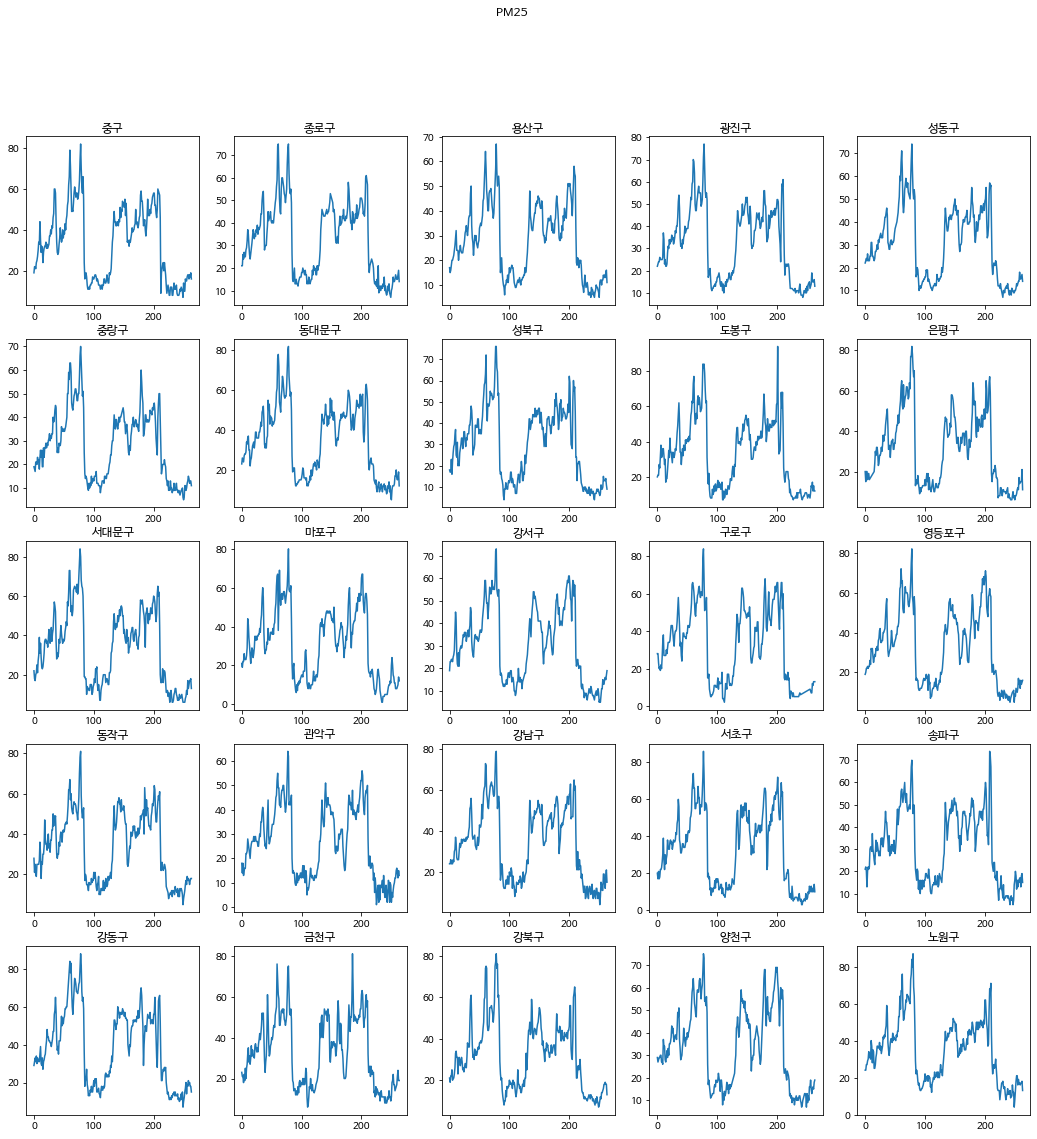

In [13]:
fig, axs = plt.subplots(5,5,figsize=(18,18))
fig.suptitle('PM25')
for i in range(5):
    for j in range(5):
        if i*5+j+1>len(mySeries): 
            continue
        axs[i, j].plot(mySeries[i*5+j].values)
        axs[i, j].set_title(namemySeries[i*5+j])
plt.show()

In [14]:
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [15]:
print("max: "+str(max(mySeries[0]))+"\tmin: "+str(min(mySeries[0])))
print(mySeries[0][:5])

max: 1.0000000000000002	min: 0.0
[0.16       0.2        0.2        0.18666667 0.22666667]


In [16]:
from sklearn.cluster import KMeans
arr = []
k_range = range(2,15)
for k in k_range:
  Kmeans = KMeans(n_clusters=k, random_state = 200)
  Kmeans.fit(mySeries)
  interia = Kmeans.inertia_
  print('k:',k,'inertia:',interia)
  arr.append(interia)
arr = np.array(arr)

k: 2 inertia: 19.687798194462328
k: 3 inertia: 16.664773776497434
k: 4 inertia: 15.376507733579686
k: 5 inertia: 14.106729345901975
k: 6 inertia: 12.551258413963067
k: 7 inertia: 11.426162813798523
k: 8 inertia: 10.607244358017486
k: 9 inertia: 9.554108773186279
k: 10 inertia: 8.54452358173413
k: 11 inertia: 7.768029218436052
k: 12 inertia: 6.8345556864452055
k: 13 inertia: 5.7675326698884035
k: 14 inertia: 5.2770801055406045


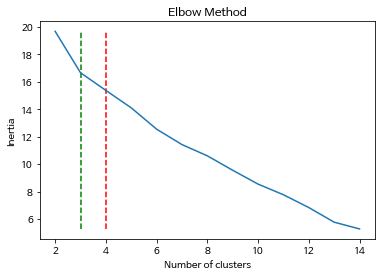

In [17]:
plt.plot(k_range,arr)
plt.vlines(3,ymin=arr.min()*0.9999,ymax=arr.max()*1.0003,linestyles='--',colors='g')
plt.vlines(4,ymin=arr.min()*0.9999,ymax=arr.max()*1.0003,linestyles='--',colors='r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score

k_range = range(2,25)
best_n = -1
best_silhouette_score = -1

for k in k_range:
  kmeans = KMeans(n_clusters = k, random_state=200)
  kmeans.fit(mySeries)
  clusters = kmeans.predict(mySeries)

  score = silhouette_score(mySeries, clusters)
  print('k:',k,'score:',score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n:', best_n, 'best score:', best_silhouette_score)

k: 2 score: 0.13998637807276318
k: 3 score: 0.15327086773038132
k: 4 score: 0.14730550160174385
k: 5 score: 0.08349718063434511
k: 6 score: 0.08351151911124333
k: 7 score: 0.08112594124631556
k: 8 score: 0.07773007027506193
k: 9 score: 0.05406151904365815
k: 10 score: 0.05861640207786268
k: 11 score: 0.05004708663575925
k: 12 score: 0.06185792768812054
k: 13 score: 0.07735310555090356
k: 14 score: 0.06577389357288269
k: 15 score: 0.06327892668980567
k: 16 score: 0.059962359426837766
k: 17 score: 0.06244290374364613
k: 18 score: 0.08044816133485239
k: 19 score: 0.07610121500705042
k: 20 score: 0.0687372601056435
k: 21 score: 0.06114991433880281
k: 22 score: 0.04567152110924167
k: 23 score: 0.03676473671900286
k: 24 score: 0.0165496772840101
best n: 3 best score: 0.15327086773038132


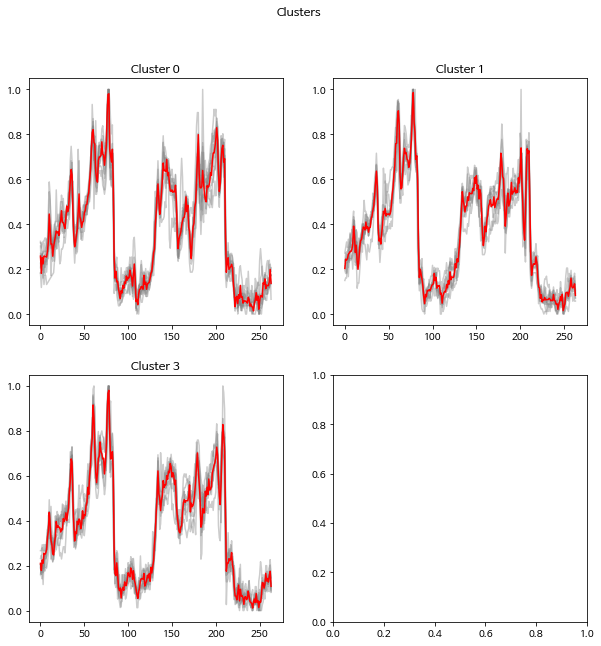

In [37]:
som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
cluster_count = 3
km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")
labels = km.fit_predict(mySeries)

plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(10,10))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()  

In [38]:
labels

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 0, 1])

In [39]:
cluster_map = []

for idx in range(len(mySeries)):
    cluster_map.append((namemySeries[idx],f"Cluster {labels[idx]+1}"))
map = pd.DataFrame(cluster_map,columns=["측정소명","Cluster"]).sort_values(by="Cluster").set_index("측정소명")
map

,Cluster
측정소명,
강서구,Cluster 1
금천구,Cluster 1
관악구,Cluster 1
동작구,Cluster 1
영등포구,Cluster 1
구로구,Cluster 1
양천구,Cluster 1
마포구,Cluster 1
은평구,Cluster 1


In [40]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
state_geo

'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [41]:
map_dictionary ={'Cluster 1': 1 , 'Cluster 2' : 2 , 'Cluster 3' : 3 , 'Cluster 4': 4,'Cluster 5': 5,'Cluster 6': 6} 
map['Cluster_n'] = map['Cluster'].map(map_dictionary)
map.reset_index(inplace=True)
map

,측정소명,Cluster,Cluster_n
0,강서구,Cluster 1,1
1,금천구,Cluster 1,1
2,관악구,Cluster 1,1
3,동작구,Cluster 1,1
4,영등포구,Cluster 1,1
5,구로구,Cluster 1,1
6,양천구,Cluster 1,1
7,마포구,Cluster 1,1
8,은평구,Cluster 1,1
9,강동구,Cluster 2,2


In [42]:
m = folium.Map(location=[37.562225,126.978555], tiles="cartodbpositron", zoom_start=11)
m
m.choropleth(
    geo_data = state_geo,
    name='Cluster_n',
    data=map,
    columns=['측정소명', 'Cluster_n'],
    key_on='feature.properties.name',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'Cluster'
)
m